In [1]:
import numpy as np
from math import sin, pi
from qiskit import BasicAer, IBMQ, Aer, QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.visualization import plot_histogram
from qiskit.aqua import QuantumInstance
from qiskit.aqua.algorithms import Grover
from qiskit.aqua.components.oracles import LogicalExpressionOracle, TruthTableOracle

In [2]:
n = 7

In [3]:
q = QuantumRegister(n-1, 'q')
clause = QuantumRegister(1, 'c')
bits = [q, clause]
circuit = QuantumCircuit(q, clause)

circuit.h(q)
circuit.h(clause)
circuit.draw()

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ H ├
     ├───┤
q_2: ┤ H ├
     ├───┤
q_3: ┤ H ├
     ├───┤
q_4: ┤ H ├
     ├───┤
q_5: ┤ H ├
     ├───┤
c_0: ┤ H ├
     └───┘

In [4]:
q = QuantumRegister(n-1,'q')
c = QuantumRegister(1,'c')
oracle = QuantumCircuit(q,c)

oracle.x(q)
oracle.x(c)

oracle.x(q[1])
oracle.mcp(-1,q,c)
oracle.x(q[1])

oracle.x(q)
oracle.x(c)
oracle.draw()

┌───┐              ┌───┐     
q_0: ┤ X ├─────────■────┤ X ├─────
     ├───┤┌───┐    │    ├───┤┌───┐
q_1: ┤ X ├┤ X ├────■────┤ X ├┤ X ├
     ├───┤└───┘    │    ├───┤└───┘
q_2: ┤ X ├─────────■────┤ X ├─────
     ├───┤         │    ├───┤     
q_3: ┤ X ├─────────■────┤ X ├─────
     ├───┤         │    ├───┤     
q_4: ┤ X ├─────────■────┤ X ├─────
     ├───┤         │    ├───┤     
q_5: ┤ X ├─────────■────┤ X ├─────
     ├───┤     ┌───┴───┐├───┤     
c_0: ┤ X ├─────┤ P(-1) ├┤ X ├─────
     └───┘     └───────┘└───┘

In [5]:
temp_q = QuantumRegister(n-1,'q')
temp_c = QuantumRegister(1,'c')
operator = QuantumCircuit(temp_q,temp_c)

operator.h(temp_q)
operator.h(temp_c)
operator.x(temp_q)
operator.x(temp_c)
operator.mcp(-1,temp_q,temp_c)
operator.x(temp_q)
operator.x(temp_c)
operator.h(temp_q)
operator.h(temp_c)

operator.draw()

┌───┐┌───┐         ┌───┐┌───┐
q_0: ┤ H ├┤ X ├────■────┤ X ├┤ H ├
     ├───┤├───┤    │    ├───┤├───┤
q_1: ┤ H ├┤ X ├────■────┤ X ├┤ H ├
     ├───┤├───┤    │    ├───┤├───┤
q_2: ┤ H ├┤ X ├────■────┤ X ├┤ H ├
     ├───┤├───┤    │    ├───┤├───┤
q_3: ┤ H ├┤ X ├────■────┤ X ├┤ H ├
     ├───┤├───┤    │    ├───┤├───┤
q_4: ┤ H ├┤ X ├────■────┤ X ├┤ H ├
     ├───┤├───┤    │    ├───┤├───┤
q_5: ┤ H ├┤ X ├────■────┤ X ├┤ H ├
     ├───┤├───┤┌───┴───┐├───┤├───┤
c_0: ┤ H ├┤ X ├┤ P(-1) ├┤ X ├┤ H ├
     └───┘└───┘└───────┘└───┘└───┘

In [16]:
qbits = QuantumRegister(n)
grover = QuantumCircuit(qbits)
grover.h(qbits)
for _ in range(11):
    grover.append(oracle,qbits)
    grover.append(operator,qbits)
grover.measure_active()
grover.draw()

┌───┐┌───────────┐┌───────────┐┌───────────┐┌───────────┐»
    q21_0: ┤ H ├┤0          ├┤0          ├┤0          ├┤0          ├»
           ├───┤│           ││           ││           ││           │»
    q21_1: ┤ H ├┤1          ├┤1          ├┤1          ├┤1          ├»
           ├───┤│           ││           ││           ││           │»
    q21_2: ┤ H ├┤2          ├┤2          ├┤2          ├┤2          ├»
           ├───┤│           ││           ││           ││           │»
    q21_3: ┤ H ├┤3 circuit8 ├┤3 circuit9 ├┤3 circuit8 ├┤3 circuit9 ├»
           ├───┤│           ││           ││           ││           │»
    q21_4: ┤ H ├┤4          ├┤4          ├┤4          ├┤4          ├»
           ├───┤│           ││           ││           ││           │»
    q21_5: ┤ H ├┤5          ├┤5          ├┤5          ├┤5          ├»
           ├───┤│           ││           ││           ││           │»
    q21_6: ┤ H ├┤6          ├┤6          ├┤6          ├┤6          ├»
           └───┘└───────────┘└───────────┘└───────────┘└───────────┘»
measure: 7/═════════════════════════════════════════════════════════»
                                                                    »
«           ┌───────────┐┌───────────┐┌───────────┐┌───────────┐┌───────────┐»
«    q21_0: ┤0          ├┤0          ├┤0          ├┤0          ├┤0          ├»
«           │           ││           ││           ││           ││           │»
«    q21_1: ┤1          ├┤1          ├┤1          ├┤1          ├┤1          ├»
«           │           ││           ││           ││           ││           │»
«    q21_2: ┤2          ├┤2          ├┤2          ├┤2          ├┤2          ├»
«           │           ││           ││           ││           ││           │»
«    q21_3: ┤3 circuit8 ├┤3 circuit9 ├┤3 circuit8 ├┤3 circuit9 ├┤3 circuit8 ├»
«           │           ││           ││           ││           ││           │»
«    q21_4: ┤4          ├┤4          ├┤4          ├┤4          ├┤4          ├»
«           │           ││           ││           ││           ││           │»
«    q21_5: ┤5          ├┤5          ├┤5          ├┤5          ├┤5          ├»
«           │           ││           ││           ││           ││           │»
«    q21_6: ┤6          ├┤6          ├┤6          ├┤6          ├┤6          ├»
«           └───────────┘└───────────┘└───────────┘└───────────┘└───────────┘»
«measure: 7/═════════════════════════════════════════════════════════════════»
«                                                                            »
«           ┌───────────┐┌───────────┐┌───────────┐┌───────────┐┌───────────┐»
«    q21_0: ┤0          ├┤0          ├┤0          ├┤0          ├┤0          ├»
«           │           ││           ││           ││           ││           │»
«    q21_1: ┤1          ├┤1          ├┤1          ├┤1          ├┤1          ├»
«           │           ││           ││           ││           ││           │»
«    q21_2: ┤2          ├┤2          ├┤2          ├┤2          ├┤2          ├»
«           │           ││           ││           ││           ││           │»
«    q21_3: ┤3 circuit9 ├┤3 circuit8 ├┤3 circuit9 ├┤3 circuit8 ├┤3 circuit9 ├»
«           │           ││           ││           ││           ││           │»
«    q21_4: ┤4          ├┤4          ├┤4          ├┤4          ├┤4          ├»
«           │           ││           ││           ││           ││           │»
«    q21_5: ┤5          ├┤5          ├┤5          ├┤5          ├┤5          ├»
«           │           ││           ││           ││           ││           │»
«    q21_6: ┤6          ├┤6          ├┤6          ├┤6          ├┤6          ├»
«           └───────────┘└───────────┘└───────────┘└───────────┘└───────────┘»
«measure: 7/═════════════════════════════════════════════════════════════════»
«                                                                            »
«           ┌───────────┐┌───────────┐┌───────────┐┌───────────┐┌───────────┐»
«    q21_0: ┤0          ├┤0          ├┤0          ├┤0   

In [17]:
backend = Aer.get_backend('qasm_simulator')
job = execute(grover,backend, shots=1024)
result = job.result()
counts = result.get_counts()

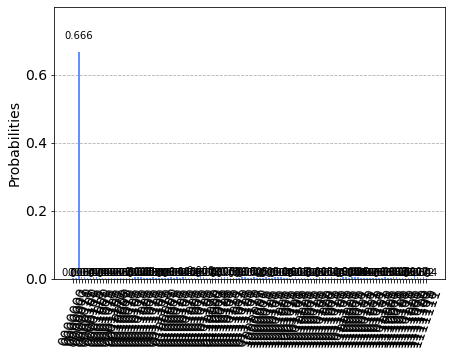

In [18]:
plot_histogram(counts)